In [ ]:
!apt-get install python3.7
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 3
!sudo apt install python3-pip
!python -m pip install --upgrade pip
!pip install pybind11
!python3 -m pip install tensorflow

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib python3.7-minimal
Suggested packages:
  python3.7-venv binfmt-support
The following NEW packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib python3.7 python3.7-minimal
0 upgraded, 4 newly installed, 0 to remove and 21 not upgraded.
Need to get 4,448 kB of archives.
After this operation, 22.5 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 libpython3.7-minimal amd64 3.7.16-1+bionic1 [589 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 python3.7-minimal amd64 3.7.16-1+bionic1 [1,725 kB]
Get:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 l

In [ ]:
!sudo apt install python3.7-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.7-dev is already the newest version (3.7.16-1+bionic1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
!wget https://www.lamsade.dauphine.fr/~cazenave/project2022.zip
!unzip project2022.zip

--2023-01-11 14:47:55--  https://www.lamsade.dauphine.fr/~cazenave/project2022.zip
Resolving www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)... 193.48.71.250
Connecting to www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)|193.48.71.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138784129 (132M) [application/zip]
Saving to: ‘project2022.zip.1’

project2022.zip.1   100%[===================>] 132.35M  27.7MB/s    in 5.5s    

2023-01-11 14:48:01 (24.1 MB/s) - ‘project2022.zip.1’ saved [138784129/138784129]

Archive:  project2022.zip
replace Board.h? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!sh compile.sh

In [ ]:
!python golois.py

2023-01-11 12:27:07.539819: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-01-11 12:27:07.539950: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-01-11 12:27:07.539970: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
getValidation
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
tcmalloc: large alloc 2400002048 bytes == 0x56a3e000 @  0x7f484dcf3887 0x7f47faeee0d9 0x7f47faef385f 0x7

In [2]:
from keras.models import load_model
from keras.utils import plot_model

/usr/lib/python3/dist-packages/Crypto/Random/Fortuna/FortunaGenerator.py:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if sys.version_info[0] is 2 and  sys.version_info[1] is 1:
/usr/lib/python3/dist-packages/Crypto/Random/Fortuna/FortunaGenerator.py:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if sys.version_info[0] is 2 and  sys.version_info[1] is 1:


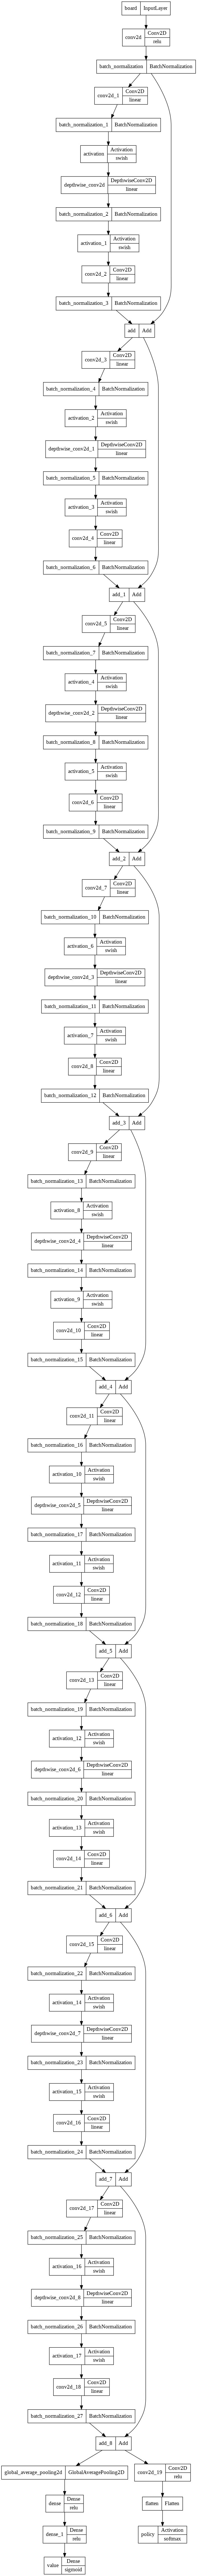

In [3]:
model_mehdi=load_model('model10_divide_pooling.h5',compile=False)
plot_model(model_mehdi, to_file='test.png',show_layer_activations=True)

In [ ]:
"""import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import layers 
from tensorflow.keras import regularizers
import gc

import golois

planes = 31
moves = 361
N = 10000
epochs = 400
batch = 128
filters = 32

def bottleneck_block(x, expand=128, squeeze=filters):
  m = layers.Conv2D(expand, (1,1), kernel_regularizer=regularizers.l2(0.0001), use_bias = False)(x)
  m = layers.BatchNormalization()(m)
  m = layers.Activation('swish')(m)
  m = layers.DepthwiseConv2D((3,3), padding='same', kernel_regularizer=regularizers.l2(0.0001), use_bias = False)(m)
  m = layers.BatchNormalization()(m)
  m = layers.Activation('swish')(m)
  m = layers.Conv2D(squeeze, (1,1), kernel_regularizer=regularizers.l2(0.0001), use_bias = False)(m)
  m = layers.BatchNormalization()(m)
  return layers.Add()([m, x])

input_data = np.random.randint(2, size=(N, 19, 19, planes))
input_data = input_data.astype ('float32')

policy = np.random.randint(moves, size=(N,))
policy = keras.utils.to_categorical (policy)

value = np.random.randint(2, size=(N,))
value = value.astype ('float32')

end = np.random.randint(2, size=(N, 19, 19, 2))
end = end.astype ('float32')

groups = np.zeros((N, 19, 19, 1))
groups = groups.astype ('float32')

print ("getValidation", flush = True)
golois.getValidation (input_data, policy, value, end)


input = keras.Input(shape=(19, 19, planes), name='board')
x = layers.Conv2D(filters, 1, activation='relu', padding='same')(input)
x = layers.BatchNormalization()(x)
for j in range(9):
  x = bottleneck_block(x)

policy_head = layers.Conv2D(1, 1, activation='relu', padding='same', use_bias = False, kernel_regularizer=regularizers.l2(0.0001))(x)
policy_head = layers.Flatten()(policy_head)
policy_head = layers.Activation('softmax', name='policy')(policy_head)
value_head = layers.GlobalAveragePooling2D()(x)
value_head = layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(value_head)
value_head = layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(value_head)
value_head = layers.Dense(1, activation='sigmoid', name='value', kernel_regularizer=regularizers.l2(0.0001))(value_head)

model = keras.Model(inputs=input, outputs=[policy_head, value_head])

model.summary ()

# Define the callback to modify the learning rate
class LearningRateScheduler(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if epoch == 100 or epoch == 200 or epoch == 300:
      optimizer.learning_rate /= 10

optimizer=keras.optimizers.Adam(learning_rate=0.02)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
              loss={'policy': 'categorical_crossentropy', 'value': 'binary_crossentropy'},
              loss_weights={'policy' : 1.0, 'value' : 1.0},
              metrics={'policy': 'categorical_accuracy', 'value': 'mse'})

for i in range (1, epochs + 1):
    print ('epoch ' + str (i))
    golois.getBatch (input_data, policy, value, end, groups, i * N)
    history = model.fit(input_data,
                        {'policy': policy, 'value': value}, 
                        epochs=1, batch_size=batch,callbacks=[LearningRateScheduler()])
    if (i % 5 == 0):
        gc.collect ()
    if (i % 20 == 0):
        golois.getValidation (input_data, policy, value, end)
        val = model.evaluate (input_data,
                              [policy, value], verbose = 0, batch_size=batch)
        print ("val =", val)
        model.save (‘test.h5')
"""